In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from pandasql import sqldf
from matplotlib.widgets import CheckButtons

# Forberedelser
Har først begynt med å bare bli kjent med datasettet. Har gjort om referansetid til datetime for å gjøre det lettere å bruke det i diverse utregninger. Finner ut om hvor mange ganger hver dato skjer i temperatur-dataen. Dette er viktig om vi velger å finne gjennomsnittet for hver dag og visualisere det. Og har visualisert hele temperatur-datasettet.

In [9]:
# Henter datasettet og kaller det temperature.
temperature = pd.read_csv('../data/temperature.csv')

# Sjekker hvilken datatype referansetid er.
temperature.info() 

# Gjør referansetid om til datetime.
temperature['referansetid'] = pd.to_datetime(temperature['referansetid'])
temperature.info()
print(temperature['referansetid'])

# Gjør referansetid om til datetime med bare år, måned og dato.
date = temperature['referansetid'].dt.date
print(date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1464 non-null   int64  
 1   verdi            1464 non-null   float64
 2   tidsforskyvning  1464 non-null   object 
 3   referansetid     1464 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 45.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Unnamed: 0       1464 non-null   int64              
 1   verdi            1464 non-null   float64            
 2   tidsforskyvning  1464 non-null   object             
 3   referansetid     1464 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 45.9+ KB
0      2024-01

Counter({datetime.date(2024, 1, 1): 4, datetime.date(2024, 1, 2): 4, datetime.date(2024, 1, 3): 4, datetime.date(2024, 1, 4): 4, datetime.date(2024, 1, 5): 4, datetime.date(2024, 1, 6): 4, datetime.date(2024, 1, 7): 4, datetime.date(2024, 1, 8): 4, datetime.date(2024, 1, 9): 4, datetime.date(2024, 1, 10): 4, datetime.date(2024, 1, 11): 4, datetime.date(2024, 1, 12): 4, datetime.date(2024, 1, 13): 4, datetime.date(2024, 1, 14): 4, datetime.date(2024, 1, 15): 4, datetime.date(2024, 1, 16): 4, datetime.date(2024, 1, 17): 4, datetime.date(2024, 1, 18): 4, datetime.date(2024, 1, 19): 4, datetime.date(2024, 1, 20): 4, datetime.date(2024, 1, 21): 4, datetime.date(2024, 1, 22): 4, datetime.date(2024, 1, 23): 4, datetime.date(2024, 1, 24): 4, datetime.date(2024, 1, 25): 4, datetime.date(2024, 1, 26): 4, datetime.date(2024, 1, 27): 4, datetime.date(2024, 1, 28): 4, datetime.date(2024, 1, 29): 4, datetime.date(2024, 1, 30): 4, datetime.date(2024, 1, 31): 4, datetime.date(2024, 2, 1): 4, datetime.

<BarContainer object of 366 artists>

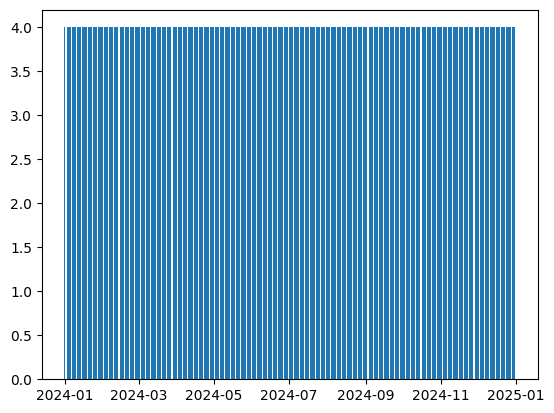

In [10]:
# Teller hvor mange ganger hver dato skjer i temperatur tabellen.
days = Counter(date)
print(days)

# Finner ut om det er noen datoer som har flere verdier enn andre.
for i in days:
    if days[i] != 4:
        print (i)

# Viser visuelt om det er noen datoer som har flere verdier enn andre.
plt.bar(days.keys(), days.values())

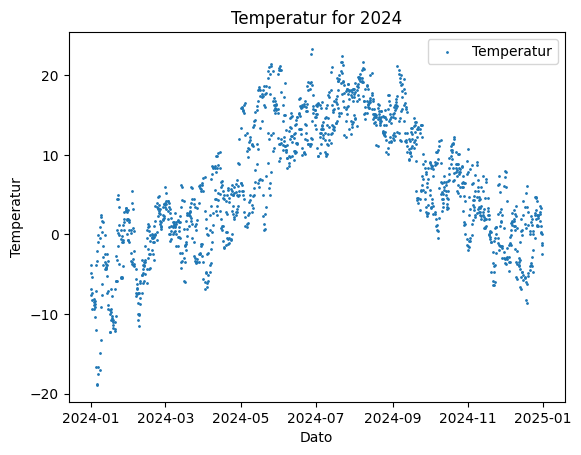

In [11]:
# Visualiserer temperaturene gjennom hele 2024.
plt.scatter(date, temperature['verdi'], label="Temperatur", s=1)        
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Temperatur for 2024') 
plt.legend()

# Ulike visualiseringer
Jobber med å visualisere de forskjellige tidsforskyvningene. Målet er at dette plottet skal være interaktivt sånn at brukeren kan velge selv hvilket plot som vises.

      Unnamed: 0  verdi  tidsforskyvning              referansetid
0              0   -4.9                0 2024-01-01 00:00:00+00:00
1              1   -3.8                1 2024-01-01 00:00:00+00:00
2              2   -7.4                0 2024-01-02 00:00:00+00:00
3              3   -5.3                1 2024-01-02 00:00:00+00:00
4              4   -8.5                0 2024-01-03 00:00:00+00:00
...          ...    ...              ...                       ...
1459        1459    2.8                1 2024-12-29 00:00:00+00:00
1460        1460    0.2                0 2024-12-30 00:00:00+00:00
1461        1461    1.0                1 2024-12-30 00:00:00+00:00
1462        1462   -1.3                0 2024-12-31 00:00:00+00:00
1463        1463    0.1                1 2024-12-31 00:00:00+00:00

[1464 rows x 4 columns]
     verdi                referansetid
0     -4.9  2024-01-01 00:00:00.000000
1     -7.4  2024-01-02 00:00:00.000000
2     -8.5  2024-01-03 00:00:00.000000
3    -10.4  202

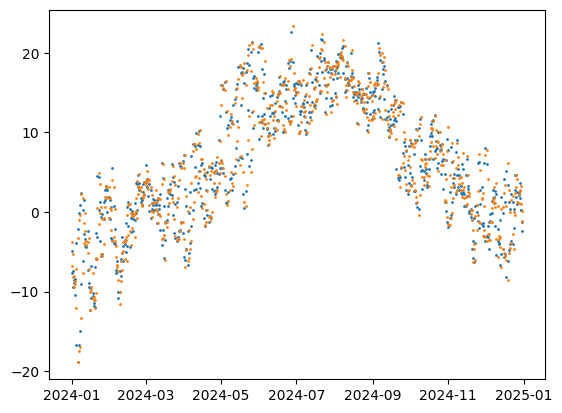

In [21]:
# Lager labels til tidsforskyvning sånn at verdiene vises med 0 og 1.
le = LabelEncoder()
temperature['tidsforskyvning'] = le.fit_transform(temperature['tidsforskyvning'])
print(temperature)
dates = temperature['referansetid'].dt.date

# Henter ut de verdiene og datoene fra temperatur der tidsforskyvningen er 0.
query_temperature_0 = f"""
    SELECT verdi, referansetid
    FROM temperature
    WHERE tidsforskyvning LIKE '0'
    """
temperature_0 = sqldf(query_temperature_0)
print(temperature_0)

# Gjør 'referansetid' om til datetime.
temperature_0['referansetid'] = pd.to_datetime(temperature_0['referansetid'])
date_0 = temperature_0['referansetid'].dt.date

# Viser visuelt verdiene med tidsforskyvning 0.
plt.scatter(date_0, temperature_0['verdi'], label="Temperatur", s=1)


# Henter ut de verdiene og datoene fra temperatur der tidsforskyvningen er 1.
query_temperature_1 = f"""
    SELECT verdi, referansetid
    FROM temperature
    WHERE tidsforskyvning LIKE '1'
    """
temperature_1 = sqldf(query_temperature_1)
print(temperature_1)

# Gjør 'referansetid' om til datetime.
temperature_1['referansetid'] = pd.to_datetime(temperature_1['referansetid'])
date_1 = temperature_1['referansetid'].dt.date

# Viser visuelt verdiene med tidsforskyvning 0.
plt.scatter(date_1, temperature_1['verdi'], label="Temperatur", s=1)

Jobber her med å visualisere ulike statitiske verdier. Planen er å også lage funksjoner for median og standeravvik. Disse funksjonene lages sånn at de kan brukes på alle tre av datasettene våre uten at vi må gjøre endringer i selve koden. 

Gjennomsnittlig verdi for datasettet er 6.22 Grader
måned
1     -4.91
2     -1.72
3      1.19
4      2.96
5     11.52
6     13.84
7     15.53
8     15.94
9     11.90
10     6.53
11     1.92
12    -0.40
Name: verdi, dtype: float64
value 6.21707650273224


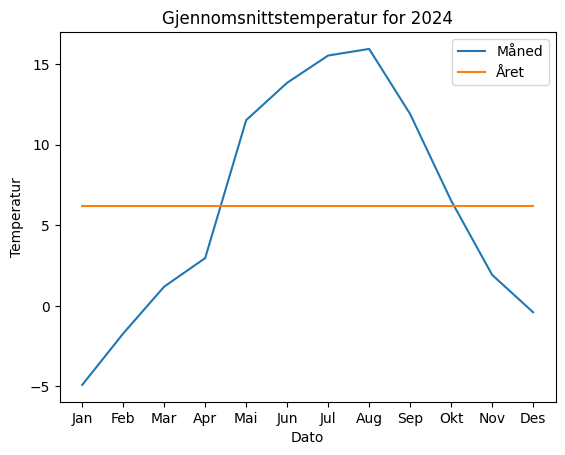

In [ ]:
# Lager en funksjon som finner ut gjennomsnittet til kolonna "verdi" i et valgt datasett.
def average(dataset):
    value = np.mean(dataset['verdi'])
    unit = input("Hva er enheten til datasettet?")
    print(f"Gjennomsnittlig verdi for datasettet er {value:.2f} {unit}")
    return value


value = average(temperature)

# Lager en ny kolonne i temperatur som forteller hvilken måned det er 
temperature['måned'] = temperature['referansetid'].dt.month

# Regner ut gjennomsnittet for hver måned
monthly_average = round(temperature.groupby('måned')['verdi'].mean(), 2)
print(monthly_average)

# Visualiserer gjennomsnittlig temperatur for hver måned
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'] 
plt.plot(months, monthly_average, label="Måned")
plt.plot(months, value*np.ones(len(months)), label="Året")
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Gjennomsnittstemperatur for 2024') 
plt.legend()